# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.precision', 10)


---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.0926385,0.0369095,42.49790748,12.21866502,8.14577748,42.62966348,12.31130352,8.18268698,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.0000000,0.0000000,44.44470996,0.00000000,0.00000000,44.59230996,0.00000000,0.00000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.0884090,0.0000000,44.44470996,0.00000000,0.00000000,44.61250796,0.08840900,0.00000000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      14605 non-null  int64         
 1   id                              14605 non-null  object        
 2   channel_sales                   14605 non-null  object        
 3   cons_12m                        14605 non-null  int64         
 4   cons_gas_12m                    14605 non-null  int64         
 5   cons_last_month                 14605 non-null  int64         
 6   date_activ                      14605 non-null  datetime64[ns]
 7   date_end                        14605 non-null  datetime64[ns]
 8   date_modif_prod                 14605 non-null  datetime64[ns]
 9   date_renewal                    14605 non-null  datetime64[ns]
 10  forecast_cons_12m               14605 non-null  float64       
 11  fo

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [5]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.26693116,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.26693116,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.26693116,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.26693116,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.26693116,0.0,0.0


In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [7]:
price_df.id.nunique()

16096

In [8]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.1629156
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.1777788
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.5000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.1629156
4,00114d74e963e47177db89bc70108537,-0.003994,-0.0000012


In [9]:
diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               16096 non-null  object 
 1   offpeak_diff_dec_january_energy  16096 non-null  float64
 2   offpeak_diff_dec_january_power   16096 non-null  float64
dtypes: float64(2), object(1)
memory usage: 377.4+ KB


In [10]:
data = pd.merge(df, diff, how="left", on="id")
data = data.drop(columns=['Unnamed: 0'])
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.0369095,42.49790748,12.21866502,8.14577748,42.62966348,12.31130352,8.18268698,1,0.020057,3.70096056
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.0000000,44.44470996,0.00000000,0.00000000,44.59230996,0.00000000,0.00000000,0,-0.003767,0.17777880
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.0000000,44.44470996,0.00000000,0.00000000,44.61250796,0.08840900,0.00000000,0,-0.004670,0.17777880
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.0000000,44.44470996,0.00000000,0.00000000,44.59329596,0.00000000,0.00000000,0,-0.004547,0.17777880
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.0737190,40.72888500,24.43733004,16.29155496,40.84879100,24.53900304,16.36527396,0,-0.006192,0.16291560


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14605 non-null  object        
 1   channel_sales                    14605 non-null  object        
 2   cons_12m                         14605 non-null  int64         
 3   cons_gas_12m                     14605 non-null  int64         
 4   cons_last_month                  14605 non-null  int64         
 5   date_activ                       14605 non-null  datetime64[ns]
 6   date_end                         14605 non-null  datetime64[ns]
 7   date_modif_prod                  14605 non-null  datetime64[ns]
 8   date_renewal                     14605 non-null  datetime64[ns]
 9   forecast_cons_12m                14605 non-null  float64       
 10  forecast_cons_year               14605 non-null  int64    

# ______________________________________________________________________
# ======================================================================
# ______________________________________________________________________

# Churn Model

### Preparing data

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['channel_sales'] = le.fit_transform(data['channel_sales'])
data['has_gas'] = le.fit_transform(data['has_gas'])
data['origin_up'] = le.fit_transform(data['origin_up'])


In [13]:
data['join_days'] = data['date_end']  - data['date_activ']
data['join_days'] = data['join_days'].astype(str).str.split(pat=' ').str[0].astype(int) 

data['diff_modfi_act_days'] = data['date_modif_prod']  - data['date_activ']
data['diff_modfi_act_days'] = data['diff_modfi_act_days'].astype(str).str.split(pat=' ').str[0].astype(int) 

data['diff_renw_act_days'] = data['date_renewal']  - data['date_activ']
data['diff_renw_act_days'] = data['diff_renw_act_days'].astype(str).str.split(pat=' ').str[0].astype(int) 

data['diff_end_renw_year'] = data['date_end']  - data['date_renewal']
data['diff_end_renw_year'] = data['diff_end_renw_year'].astype(str).str.split(pat=' ').str[0].astype(int) / 365

data['diff_end_modif_days'] = data['date_end']  - data['date_modif_prod']
data['diff_end_modif_days'] = data['diff_end_modif_days'].astype(str).str.split(pat=' ').str[0].astype(int)

In [14]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(data.drop(columns=['date_end','date_activ','date_modif_prod','date_renewal'])
                                 ,random_state=104, test_size=0.2, shuffle=True)
train.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,join_days,diff_modfi_act_days,diff_renw_act_days,diff_end_renw_year,diff_end_modif_days
2225,1d745e84464f51e8a0e04d188b7a0063,4,6129,0,0,892.11,0,0.0,0.00,0.137440,...,0.0,0.0,0,-0.009304,-0.0000012,1413,1347,1053,0.9863013699,66
12977,743354298b704c8fb97205fa676c1c51,4,5628,0,0,842.08,0,0.0,18.27,0.145711,...,0.0,0.0,0,-0.001834,0.1777788,1096,0,731,1.0000000000,1096
3058,ac1d6a51ab253efeb8d6c52131c1cdda,4,28353,0,2425,850.15,524,0.0,13.74,0.145711,...,0.0,0.0,0,-0.005533,0.1777788,1461,551,1097,0.9972602740,910
10097,14cc98fea7979ce8be2497f10789c6e5,2,3610,0,0,536.24,0,0.0,16.93,0.144328,...,0.0,0.0,1,-0.002275,0.0000000,1461,1063,1097,0.9972602740,398
12297,1dce9b927959bdd7a7f429062c0da7ba,0,2937,0,0,213.99,0,0.0,16.84,0.147506,...,0.0,0.0,0,-0.003045,2.1777792,1827,0,1462,1.0000000000,1827


In [15]:
x = train.drop(columns=['id','churn'])
y = train.churn

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=104, test_size=0.15, shuffle=True)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

## Modeling

#### 1. Start with a Dummy Model (np.rand) - Baseline Model

In [17]:
m = y_test.shape[0]
rand_y_test = np.random.randint(2,size= m)
rand_y_test

array([0, 1, 0, ..., 1, 0, 1])

In [18]:
random_accuarcy = acc(y_test,rand_y_test)
random_accuarcy

0.513405590416429

In [19]:
random_f1 = f1(y_test,rand_y_test)
random_f1

0.18993352326685659

#### 2. Simple Model (linear)
- Linear model
- calculate score
- calculate feature imporance
- Simple model with top 10/20 features

In [20]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred), f1(y_test, y_pred))

0.9047347404449515 0.0


c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
feature_imp = pd.DataFrame({"features":list(x_train.columns), "coef":list(model.coef_[0])}) 

<Axes: xlabel='features'>

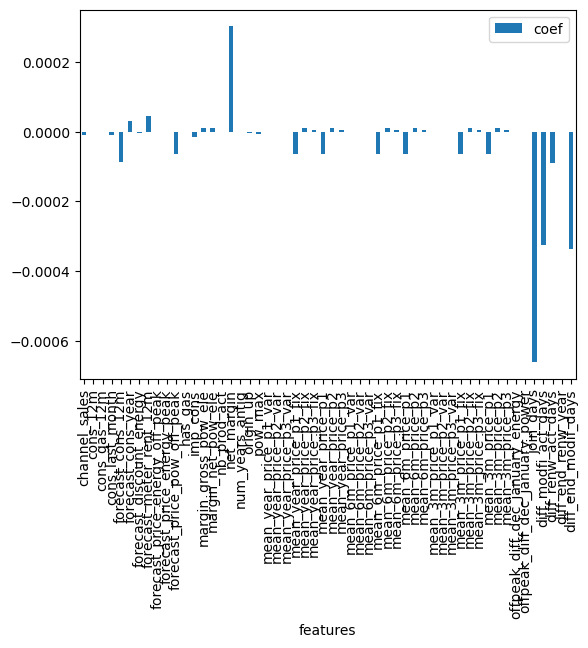

In [22]:
feature_imp.plot(x="features", y="coef", kind="bar")

In [23]:
feature_imp.sort_values("coef")

,features,coef
49,join_days,-0.0006616976
53,diff_end_modif_days,-0.0003362414
50,diff_modfi_act_days,-0.0003254562
51,diff_renw_act_days,-0.0000906757
4,forecast_cons_12m,-0.0000856176
44,mean_3m_price_p1,-0.0000637408
35,mean_6m_price_p1,-0.0000636055
41,mean_3m_price_p1_fix,-0.0000635005
26,mean_year_price_p1,-0.0000634840
32,mean_6m_price_p1_fix,-0.0000633648


In [24]:
top_15_col = feature_imp[np.abs(feature_imp["coef"])>0.0000155863]["features"]

In [25]:
x = train[list(top_15_col)]
y = train.churn

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=104, test_size=0.15, shuffle=True)

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred), f1(y_test, y_pred))

0.9047347404449515 0.0


In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11684 entries, 2225 to 8261
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   forecast_cons_12m            11684 non-null  float64
 1   forecast_cons_year           11684 non-null  int64  
 2   forecast_meter_rent_12m      11684 non-null  float64
 3   forecast_price_pow_off_peak  11684 non-null  float64
 4   net_margin                   11684 non-null  float64
 5   mean_year_price_p1_fix       11684 non-null  float64
 6   mean_year_price_p1           11684 non-null  float64
 7   mean_6m_price_p1_fix         11684 non-null  float64
 8   mean_6m_price_p1             11684 non-null  float64
 9   mean_3m_price_p1_fix         11684 non-null  float64
 10  mean_3m_price_p1             11684 non-null  float64
 11  join_days                    11684 non-null  int32  
 12  diff_modfi_act_days          11684 non-null  int32  
 13  diff_renw_act_days 

#### 3. Simple Model with Balanced Dataset

First : Upsampling

In [27]:
from imblearn.over_sampling import SMOTE


print('Before UpSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, the shape of train_X: (9931, 15)
Before UpSampling, the shape of train_y: (9931,) 

Before UpSampling, counts of label '1': 965
Before UpSampling, counts of label '0': 8966 

After UpSampling, counts of label '1': 8966
After UpSampling, counts of label '0': 8966 

After UpSampling, the shape of train_X: (17932, 15)
After UpSampling, the shape of train_y: (17932,) 



In [28]:
from sklearn import metrics


model = LogisticRegression()
model.fit(x_train_res,y_train_res)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.5681688533941814 0.21554404145077719
[[892 694]
 [ 63 104]]
              precision    recall  f1-score   support

           0       0.93      0.56      0.70      1586
           1       0.13      0.62      0.22       167

    accuracy                           0.57      1753
   macro avg       0.53      0.59      0.46      1753
weighted avg       0.86      0.57      0.66      1753



c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Second : Downsampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x_train, y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_rus==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_rus==0)))



print('After UpSampling, the shape of train_X: {}'.format(x_rus.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_rus.shape))

After UpSampling, counts of label '1': 965
After UpSampling, counts of label '0': 965 

After UpSampling, the shape of train_X: (1930, 15)
After UpSampling, the shape of train_y: (1930,) 



In [30]:
from sklearn import metrics


model = LogisticRegression()
model.fit(x_train_res,y_train_res)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.5681688533941814 0.21554404145077719
[[892 694]
 [ 63 104]]
              precision    recall  f1-score   support

           0       0.93      0.56      0.70      1586
           1       0.13      0.62      0.22       167

    accuracy                           0.57      1753
   macro avg       0.53      0.59      0.46      1753
weighted avg       0.86      0.57      0.66      1753



c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 4. Complex and Explainable Model (Tree Based)


First : Decision Tree

In [31]:
# DecisionTreeClassifier With original data
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8248716486023959 0.12034383954154729
[[1425  161]
 [ 146   21]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1586
           1       0.12      0.13      0.12       167

    accuracy                           0.82      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.83      0.82      0.83      1753



In [32]:
# DecisionTreeClassifier With Upsampling data
model = DecisionTreeClassifier()
model.fit(x_train_res,y_train_res)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.7997718197375927 0.14598540145985403
[[1372  214]
 [ 137   30]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1586
           1       0.12      0.18      0.15       167

    accuracy                           0.80      1753
   macro avg       0.52      0.52      0.52      1753
weighted avg       0.83      0.80      0.82      1753



In [33]:
# DecisionTreeClassifier With Downsampling data
model = DecisionTreeClassifier()
model.fit(x_rus,y_rus)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.5413576725613235 0.18787878787878787
[[856 730]
 [ 74  93]]
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      1586
           1       0.11      0.56      0.19       167

    accuracy                           0.54      1753
   macro avg       0.52      0.55      0.43      1753
weighted avg       0.84      0.54      0.63      1753



Second : Random Forest

In [34]:
# RandomForestClassifier With Original data
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.903593839132915 0.04519774011299435
[[1580    6]
 [ 163    4]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1586
           1       0.40      0.02      0.05       167

    accuracy                           0.90      1753
   macro avg       0.65      0.51      0.50      1753
weighted avg       0.86      0.90      0.86      1753



In [35]:
# RandomForestClassifier With Upsampling data
model = RandomForestClassifier()
model.fit(x_train_res,y_train_res)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8750713063320023 0.08368200836820085
[[1524   62]
 [ 157   10]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1586
           1       0.14      0.06      0.08       167

    accuracy                           0.88      1753
   macro avg       0.52      0.51      0.51      1753
weighted avg       0.83      0.88      0.85      1753



In [36]:
# RandomForestClassifier With Downsampling data
model = RandomForestClassifier()
model.fit(x_rus,y_rus)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.57843696520251 0.19058050383351588
[[927 659]
 [ 80  87]]
              precision    recall  f1-score   support

           0       0.92      0.58      0.72      1586
           1       0.12      0.52      0.19       167

    accuracy                           0.58      1753
   macro avg       0.52      0.55      0.45      1753
weighted avg       0.84      0.58      0.67      1753



#### 5. Deeper Model (XGBoost,catboost)

First : XGBoost

In [37]:
# XGBClassifier With original data
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8996006845407872 0.043478260869565216
[[1573   13]
 [ 163    4]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1586
           1       0.24      0.02      0.04       167

    accuracy                           0.90      1753
   macro avg       0.57      0.51      0.50      1753
weighted avg       0.84      0.90      0.86      1753



In [38]:
# XGBClassifier With Upsampling data
model = XGBClassifier()
model.fit(x_train_res,y_train_res)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8796349115801483 0.11715481171548119
[[1528   58]
 [ 153   14]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1586
           1       0.19      0.08      0.12       167

    accuracy                           0.88      1753
   macro avg       0.55      0.52      0.53      1753
weighted avg       0.84      0.88      0.86      1753



In [39]:
# XGBClassifier With Downsampling data
model = XGBClassifier()
model.fit(x_rus,y_rus)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.5658870507701084 0.21627188465499483
[[887 699]
 [ 62 105]]
              precision    recall  f1-score   support

           0       0.93      0.56      0.70      1586
           1       0.13      0.63      0.22       167

    accuracy                           0.57      1753
   macro avg       0.53      0.59      0.46      1753
weighted avg       0.86      0.57      0.65      1753



Second : CatBoost

In [40]:
# CatBoostClassifier With original data
model = CatBoostClassifier(verbose=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9053051911009697 0.03488372093023255
[[1584    2]
 [ 164    3]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1586
           1       0.60      0.02      0.03       167

    accuracy                           0.91      1753
   macro avg       0.75      0.51      0.49      1753
weighted avg       0.88      0.91      0.86      1753



In [41]:
# CatBoostClassifier With Upsampling data
model = CatBoostClassifier(verbose=0)
model.fit(x_train_res,y_train_res)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8876212207644039 0.10859728506787329
[[1544   42]
 [ 155   12]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1586
           1       0.22      0.07      0.11       167

    accuracy                           0.89      1753
   macro avg       0.57      0.52      0.52      1753
weighted avg       0.84      0.89      0.86      1753



In [42]:
# CatBoostClassifier With Downsampling data
model = CatBoostClassifier(verbose=0)
model.fit(x_rus,y_rus)
y_pred = model.predict(x_test)
print(acc(y_test,y_pred),
       f1(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.616657159155733 0.2204176334106729
[[986 600]
 [ 72  95]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1586
           1       0.14      0.57      0.22       167

    accuracy                           0.62      1753
   macro avg       0.53      0.60      0.48      1753
weighted avg       0.86      0.62      0.70      1753



### The Best Model is : CatBoostClassifier With Downsampling data